# [ICTCOG AI Academy] 7기 고급시각저녁반
# GAN(2)

### GAN(generative adversarial network)
- 비지도 학습
- 적대적 생성 모델
  - generative model 생성 모델: **분포기반**으로 생성
#### 적대적 경쟁
- 생성자 : 와인 위조범에게 피드백을 주어 가짜 술을 더 정교하게 만듦
- 식별자: 반대로 판별자도 학습하여 위조를 판별하는 능력을 향상


> 실수할 확률을 최소화하도록 능력을 극대화 시킴

In [82]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [3]:
(X_train,y_train),(_,_) =tf.keras.datasets.mnist.load_data()  #비지도 학습 test 불필요

In [5]:
X_train = X_train.reshape(-1,28,28,1)

- 한번 양수가 되면 계속 양수
- 학습이 어려움

In [ ]:
#X_train /255 # 0~1 값이므로 항상 양수

#### zero-centered
>  hyperbolic tangent [-1,1]
- [-1,1] 정규화
- $\frac{x-min}{\frac{Max-min}{2}} -1 = \frac{x-127.5}{{127.5}} $

In [6]:
X_train = (X_train-127.5)/127.5
X_train

array([[[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        ...,

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]]],


       [[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [

### optimization technique 
1. `tf.data`
2. `@tf.function`

In [68]:
#데이터 최적화데이터 최적화
BATCH=256
# 데이터 배치를 만들고 섞습니다.
Dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(60000).batch(BATCH) 

Leaky Relu
- ReLu에서 한번 0이되면 계속 0이되는 현상을 방지하기위해 도입입

In [ ]:
tf.keras.layers.LeakyReLU         #레이어에 LeakyReLU 있음음

In [ ]:
tf.keras.layers.BatchNormalization #batch크기만큼 정규화화

In [49]:
DIM=100
class GAN(tf.keras.models.Model):
  #내부에 모델 구현
  def __init__(self, DIM):
    # CVAE decoder 부분 가져옴
    inputs= tf.keras.Input(shape=(latent_dim,))
    x=tf.keras.layers.Dense(units=7*7*32)(inputs)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.LeakyReLU ()(x)

    x=tf.keras.layers.Reshape((7, 7, 32))(x)

    x=tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.LeakyReLU ()(x)
    x=tf.keras.layers.Conv2DTranspose( 32, 3, strides=2, padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.LeakyReLU ()(x)

    # No activation
    outputs=tf.keras.layers.Conv2DTranspose( 1, 3, padding='same')(x)

  generator = tf.keras.models.Model(inputs=inputs,outputs=outputs)

  def call(self):
    pass

In [34]:
latent_dim=100

inputs= tf.keras.Input(shape=(latent_dim,))

x=tf.keras.layers.Dense(units=7*7*32)(inputs)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.LeakyReLU ()(x)

x=tf.keras.layers.Reshape((7, 7, 32))(x)

x=tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.LeakyReLU ()(x)
x=tf.keras.layers.Conv2DTranspose( 32, 3, strides=2, padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.LeakyReLU ()(x)

# No activation
outputs=tf.keras.layers.Conv2DTranspose( filters=1, kernel_size=3, padding='same')(x)

generator = tf.keras.models.Model(inputs=inputs,outputs=outputs)

In [35]:
noise =tf.random.normal([1,100])

In [36]:
import matplotlib.pyplot as plt

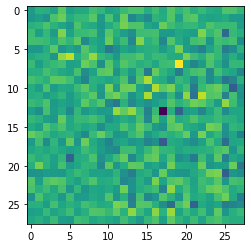

In [38]:
plt.imshow(generator(noise)[0].numpy().reshape(28,28)) #랜덤한 이미지

In [44]:
inputs=tf.keras.Input(shape=(28,28,1))
x=tf.keras.layers.Conv2D(32,3,strides=2,padding='same')(inputs)
x=tf.keras.layers.LeakyReLU()(x)
x=tf.keras.layers.Dropout(0.3)(x)

x=tf.keras.layers.Conv2D(32,3,strides=2,padding='same')(x)
x=tf.keras.layers.LeakyReLU()(x)
x=tf.keras.layers.Dropout(0.3)(x)

x=tf.keras.layers.Flatten()(x)
outputs=tf.keras.layers.Dense(1 )(x) #이진 분류utputs=tf.keras.layers.Dense(1 )(x) #이진 분류

discriminator = tf.keras.models.Model(inputs=inputs,outputs=outputs)

In [41]:
img=generator(noise)[0]

In [42]:
img.shape

TensorShape([28, 28, 1])

In [45]:
discriminator(img[tf.newaxis]) # < 0.5 -> 가짜!

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00637533]], dtype=float32)>

In [93]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # 주목: 배치사이즈로 None이 주어집니다.

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model
    
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [111]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True) #수치적 안정성
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

#### loss function 
- 각 discriminator, generator loss를 분리했으므로 tracking 가능

In [94]:
def discriminator_loss(real_output, fake_output):
   #실제이미지와 가짜이미지를 입력 받음
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    #2개의 loss 합
    total_loss = real_loss + fake_loss
    return total_loss

In [95]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output) #실제 1과 가짜와의 차이

#### 학습
- 동시 학습 아닌 순차적 학습
- 실행순서 : generator -> discriminator

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [116]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

#### with

In [97]:
x=tf.Variable([2.,3.,4.])
y=x*x
with tf.GradientTape() as t:  #__enter__(), __exit__()
  y=x*x  
  z=y+3
#동일한 구조 !

In [98]:
t.gradient(z,x)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4., 6., 8.], dtype=float32)>

In [99]:
t.gradient(z,y)

RuntimeError: ignored

In [103]:
class A:
  def __enter__(self):
    print('N A')
  def __exit__(self,a,b,c):
    print('X A')

class B:
  def __enter__(self):
    print('N B')
  def __exit__(self,a,b,c):
    print('X B')

In [101]:
#방법 1
with A() as a:
  with B() as B:
    pass

N A
N B
X B
X A


In [104]:
#방법 2
with A( ),  B() :
    pass

N A
N B
X B
X A


---
힘수 하나 더 만들어야함

In [105]:
#체크포인트 저장
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=tf.keras.optimizers.Adam(1e-4),
                                 discriminator_optimizer=tf.keras.optimizers.Adam(1e-4),
                                                                  generator=generator,   discriminator=discriminator)

In [113]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # GIF 생성
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 15 에포크가 지날 때마다 모델을 저장
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    # print (' 에포크 {} 에서 걸린 시간은 {} 초 입니다'.format(epoch +1, time.time()-start))
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # 마지막 에포크가 끝난 후 생성
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs,  seed)

In [114]:
def generate_and_save_images(model, epoch, test_input):
  # 이미지 생성 및 저장
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

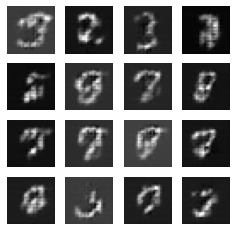

Time for epoch 35 is 124.36999368667603 sec


KeyboardInterrupt: ignored

In [117]:
train(Dataset,EPOCHS)  #점점 숫자모양 나옴

> data augmentation
  - 성능 향상에는 한계가 있음 
  - overfitting 방지용 data augmentation
  -  GAN,VAE 등을 통해서 이미지 생성해서 사용하는 경우 있음 data augmentation
    - 성능 향상에는 한계가 있음 
      - overfitting 방지용 data augmentation
        -  GAN,VAE 등을 통해서 이미지 생성해서 사용하는 경우 있음
            - GAN 은 이미지가 비교적 많이 필요 하지 않아 
    - GAN 은 이미지가 비교적 많이 필요 하지 않아 

In [90]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
#GIF 생성
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

#### 경량 딥러닝 기술 동향
- 가능한 성능을 유지한체 모델의 연산 복잡도를 줄이도록 단순화함
- 일반적 성능이 나빠지게 됨

##### 경량 딥러닝 연구 동향
1. 경량 알고리즘 연구 : 
  - 모델 구조 변경(Resnet,DenseNet, SqueezeNet) 
  - 합성곱 필터 변경(MobileNetm ShuffleNet)
  - 자동 모델 탐색
2. 알고리즘 경량화 연구: 
  - 모델 압축(Deep Compression)
  - 지식 증류(Knowledge Distillation): 불순물 날리고 핵심만 전달량 딥러닝 연구 동향
  1. 경량 알고리즘 연구 : 
    - 모델 구조 변경(Resnet,DenseNet, SqueezeNet) 
      - 합성곱 필터 변경(MobileNetm ShuffleNet)
        - 자동 모델 탐색
        2. 알고리즘 경량화 연구: 
          - 모델 압축(Deep Compression)
            - 지식 증류(Knowledge Distillation): 불순물 날리고 핵심만 전달
              -  HW 가속화
                - 모델 압축 자동 탐색
  -  HW 가속화
  - 모델 압축 자동 탐색

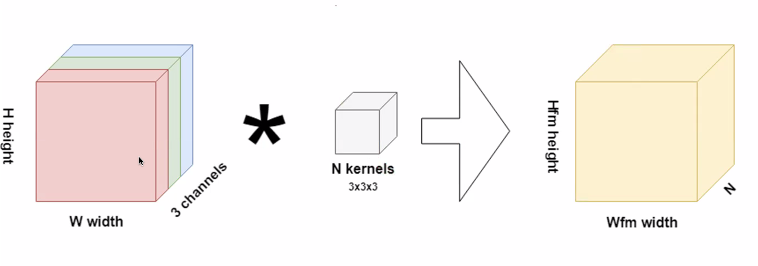

### Depth-wise
Depth 별로 컨볼루션하여 연산량 줄임

In [ ]:
tf.keras.layers.DepthwiseConv2D 

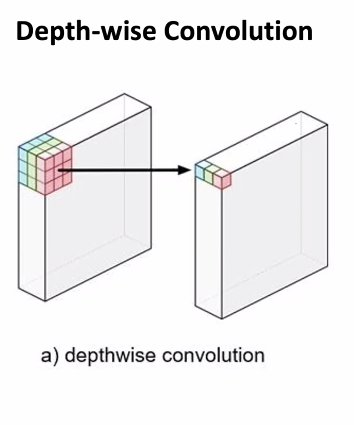

### Point-wise

차원 축소
- 1x1 컨볼루션을 일컫는다

In [ ]:
class PointwiseConv2D(tf.keras.layers.Layer):
  def __init__(self, input_channel, output_channel):
    super().__init__()
    self.pointwise =tf.keras.layers.Layer.Conv2D(input_channel, output_channel,kernel_size=1)
  def call(self,x):
    return self.pointwise(x)

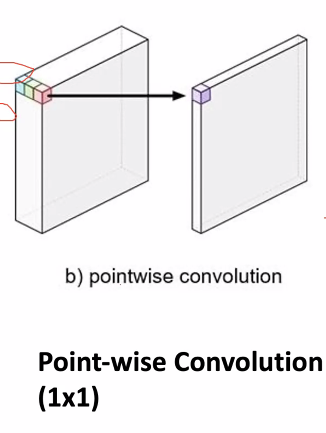

### Depth-wise Separable Convolution

In [ ]:
class DepthwiseSeparableConv2D(tf.keras.layers.Layer):
    def __init__(self, in_channel, out_channel, kernels_per_layer):
        super().__init__()
        self.depthwise = DepthwiseConv2D(in_channel, out_channel, kernels_per_layer)
        self.pointwise = Conv2D(in_channel * kernels_per_layer, out_channel, kernel_size=1)
    def call(self, x):
        out = self.depthwise(x)
        out = self.pointwise(out)
        return out

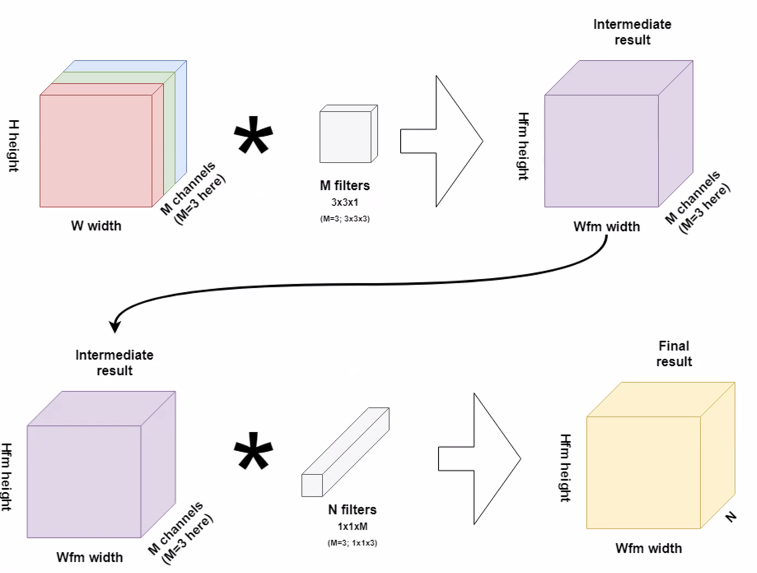